<div style="width:100%;text-align: center;"> <img align=middle src="https://i.gifer.com/CzQd.gif" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>

# <h1 style='background:#30D5C8; border:0; color:white'><center>🐟🐠Sea Animals Image Classification</center></h1> 

# **<span style="color:#2E8B57;">📰About the Dataset</span>**

In this dataset, there are 19 different classes available and may be extended further in the future. The images are resized to either (300px, n) or (n,300px) where n is a pixel size less than 300px.

In [5]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Imports
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
import seaborn as sns
import matplotlib.pyplot as plt

# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# **<span style="color:#2E8B57;">📰Get Data and apply some augmentation</span>**

In [7]:
data = "../input/sea-animals-image-dataste"

In [8]:
image_dir = Path(data)

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [9]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("../input/sea-animals-image-dataste").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [10]:
image_df

,Filepath,Label
0,../input/sea-animals-image-dataste/Penguin/134...,Penguin
1,../input/sea-animals-image-dataste/Penguin/681...,Penguin
2,../input/sea-animals-image-dataste/Penguin/767...,Penguin
3,../input/sea-animals-image-dataste/Penguin/847...,Penguin
4,../input/sea-animals-image-dataste/Penguin/329...,Penguin
...,...,...
11737,../input/sea-animals-image-dataste/Turtle_Tort...,Turtle_Tortoise
11738,../input/sea-animals-image-dataste/Turtle_Tort...,Turtle_Tortoise
11739,../input/sea-animals-image-dataste/Jelly Fish/...,Jelly Fish
11740,../input/sea-animals-image-dataste/Jelly Fish/...,Jelly Fish


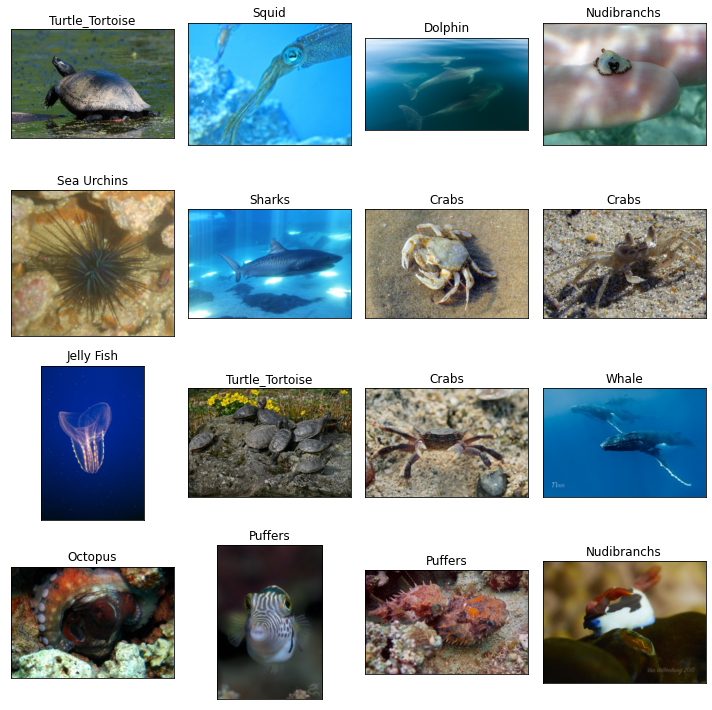

In [11]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                                  shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [13]:
train_images = train_datagen.flow_from_directory(
    data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

validation_images = train_datagen.flow_from_directory(
    data , # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 9402 images belonging to 19 classes.
Found 2340 images belonging to 19 classes.


In [19]:
# Load the pretained model
mobile_model = Sequential()

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

mobile_model.add(pretrained_model)

In [20]:
mobile_model.add(Flatten())
mobile_model.add(Dense(512, activation='relu'))
mobile_model.add(Dropout(0.2))
mobile_model.add(Dense(19, activation='softmax'))

In [21]:
mobile_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               655872    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 19)                9747      
Total params: 2,923,603
Trainable params: 665,619
Non-trainable params: 2,257,984
_________________________________________________________________


In [22]:
mobile_model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

history = mobile_model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=10)

Epoch 1/10
294/294 [==============================] - 155s 520ms/step - loss: 1.1485 - accuracy: 0.6554 - val_loss: 0.7666 - val_accuracy: 0.7632
Epoch 2/10
294/294 [==============================] - 150s 509ms/step - loss: 0.8240 - accuracy: 0.7482 - val_loss: 0.7332 - val_accuracy: 0.7667
Epoch 3/10
294/294 [==============================] - 150s 508ms/step - loss: 0.7592 - accuracy: 0.7610 - val_loss: 0.7241 - val_accuracy: 0.7637
Epoch 4/10
294/294 [==============================] - 151s 514ms/step - loss: 0.7084 - accuracy: 0.7742 - val_loss: 0.7225 - val_accuracy: 0.7705
Epoch 5/10
294/294 [==============================] - 154s 523ms/step - loss: 0.6568 - accuracy: 0.7895 - val_loss: 0.6729 - val_accuracy: 0.7782
Epoch 6/10
294/294 [==============================] - 151s 515ms/step - loss: 0.6444 - accuracy: 0.7948 - val_loss: 0.6613 - val_accuracy: 0.7829
Epoch 7/10
294/294 [==============================] - 150s 512ms/step - loss: 0.6150 - accuracy: 0.8031 - val_loss: 0.7451 -

In [ ]:
print(history.history.keys())

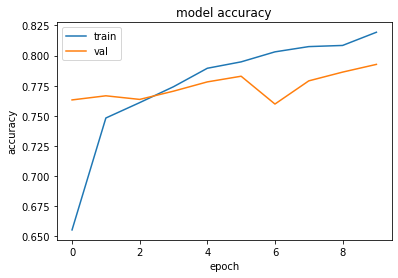

In [23]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

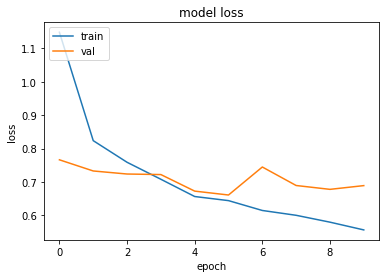

In [24]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 🤘Conclusion
**This marks the end of 🐟🐠Sea Animals Image Classification**

**Stay Tuned for more..**

**Please share your feedback and suggestions and help me improve 😇**